<a href="https://colab.research.google.com/github/TheUnboundedSoul/TrabalhoDeIAA/blob/main/TrabalhoIIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()


Saving medical_insurance.csv to medical_insurance.csv


Loading started at 1718310059.804922, ended at 1718310059.8227613, took 0.01783919334411621 second(s)
Cross-validation R^2 scores: [0.75197533 0.76326918 0.68603062 0.67232158 0.77632918]
Average cross-validation R^2 score: 0.7299851784159159
Model Coefficients: [   261.03484124    307.51614048    478.49654536   -138.25427396
    138.25427396 -11651.91296407  11651.91296407    681.24188425
     22.94828799   -440.24236749   -263.94780476], Intercept: -163.3467822736402
Erro quadrático médio (MSE): 36402262.795556314
Erro absoluto médio (MAE): 4099.0979820251505
R^2 Score: 0.7603711755238075
Intercept: -163.3467822736402


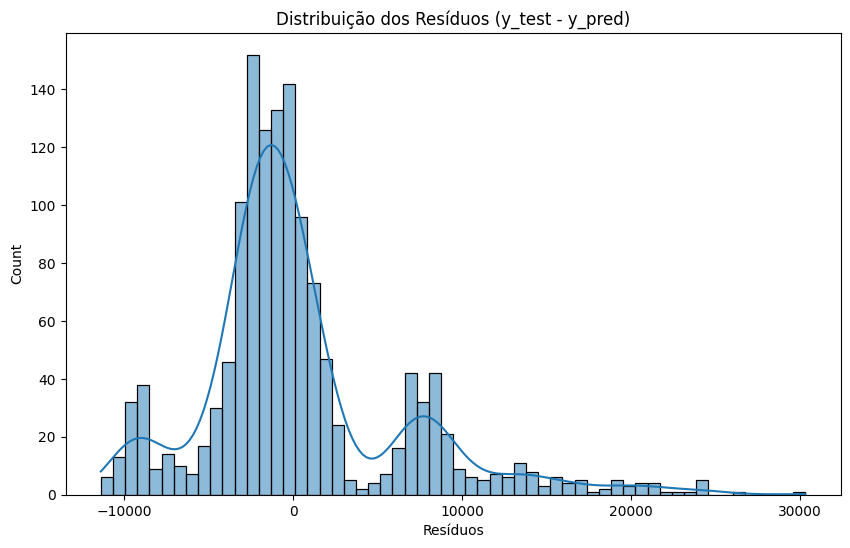

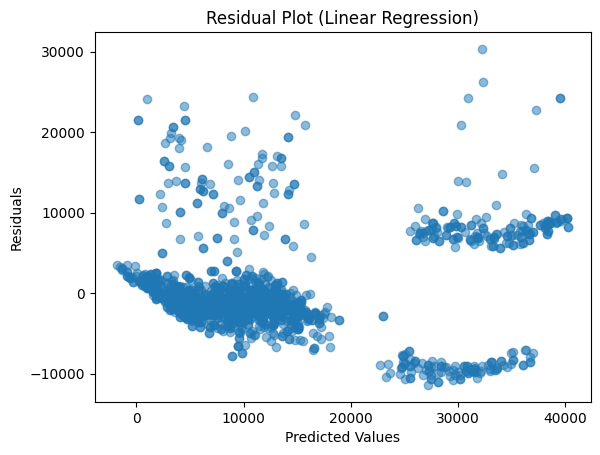

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


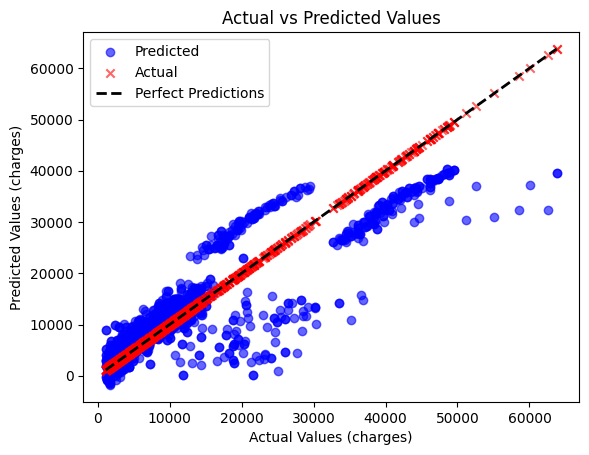

Mounted at /content/drive


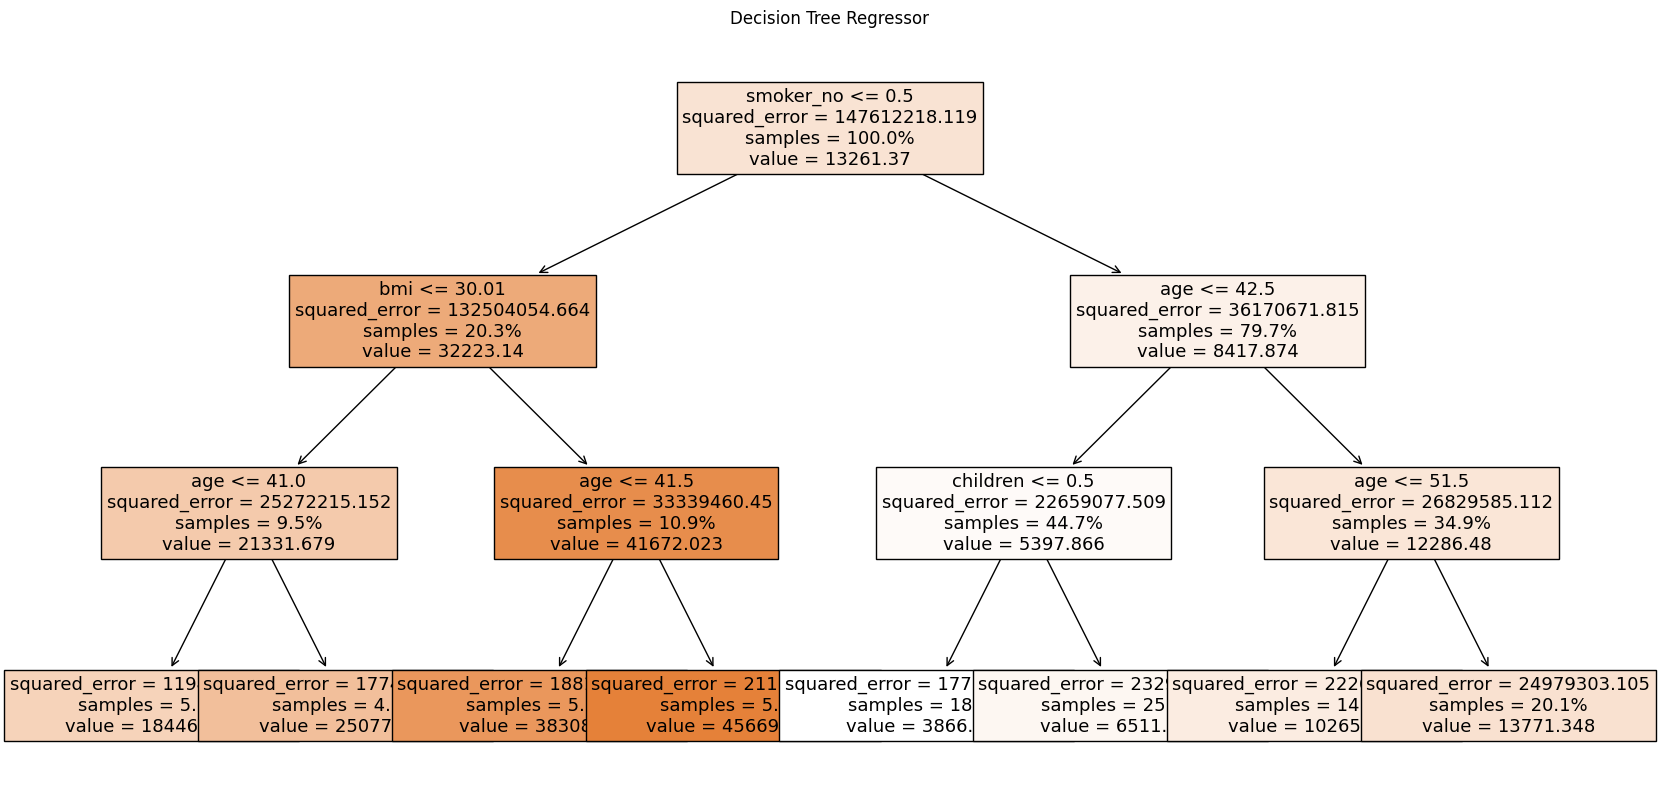

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import joblib
import seaborn as sns
import time
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

#-----------------------------------------------------------------------------------------------------------------------
# 1 - prepare data
iTimeWhenLoadingStarted = time.time()
# Carregar o CSV
df = pd.read_csv('medical_insurance.csv')
iTimeWhenLoadingCompleted = time.time()
iSecondsTheLoadingTook = iTimeWhenLoadingCompleted-iTimeWhenLoadingStarted
strFormat = "Loading started at {}, ended at {}, took {} second(s)".format(iTimeWhenLoadingStarted, iTimeWhenLoadingCompleted, iSecondsTheLoadingTook)
print(strFormat)

# Convertendo variáveis categóricas em variáveis dummy (também conhecidas como variáveis indicadoras)
df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'])

# Dividir os dados em variáveis independentes (X) e variável dependente (y)
X = df.drop(columns=['charges'])
y = df['charges']

# Normalizar as variáveis independentes
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

#-----------------------------------------------------------------------------------------------------------------------
# 2 - create and train the model

# Criar o modelo de regressão linear
model = LinearRegression()

# Treinar o modelo com nossos dados
model.fit(X_train, y_train)

#-----------------------------------------------------------------------------------------------------------------------
# 3 - validate the model using cross-validation

# Avaliar o modelo usando validação cruzada
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
print("Cross-validation R^2 scores:", cv_scores)
print("Average cross-validation R^2 score:", np.mean(cv_scores))

#-----------------------------------------------------------------------------------------------------------------------
# 4 - check the results

# Obter parâmetros (coeficientes e intercepto)
slope = model.coef_
intercept = model.intercept_

# Imprimir os coeficientes e o intercepto do modelo
print(f"Model Coefficients: {slope}, Intercept: {intercept}")

# Avaliar o modelo
y_pred = model.predict(X_test)

# Calcular o erro quadrático médio (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calcular o erro absoluto médio (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calcular o coeficiente de determinação (R^2)
r2 = r2_score(y_test, y_pred)

# intercept
intercept = model.intercept_

# Imprimir MSE e R^2 Score
print("Erro quadrático médio (MSE):", mse)
print("Erro absoluto médio (MAE):", mae)
print("R^2 Score:", r2)
print("Intercept:", intercept)

# Análise de Resíduos
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title("Distribuição dos Resíduos (y_test - y_pred)")
plt.xlabel("Resíduos")
plt.show()

plt.scatter(y_pred, residuals, alpha=0.5)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot (Linear Regression)")
plt.show()

#-----------------------------------------------------------------------------------------------------------------------
# 5 - use the model to predict

# Fazer previsões para todos os dados
y_pred_all = model.predict(X_scaled)

#-----------------------------------------------------------------------------------------------------------------------
# 6 - plot the prediction (red) AND the real data (blue)

# Para a visualização, vamos plotar um gráfico de dispersão dos valores reais vs preditos

# Gráfico de dispersão dos valores preditos (dados de teste)
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', label='Predicted')  # Valores preditos

# Gráfico de dispersão dos valores reais (dados de teste)
plt.scatter(y_test, y_test, alpha=0.6, color='red', marker='x', label='Actual')  # Valores reais

# Linha de previsões perfeitas (onde valor predito = valor real)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Predictions')

# Rotulação dos eixos
plt.xlabel("Actual Values (charges)")
plt.ylabel("Predicted Values (charges)")

# Título do gráfico
plt.title("Actual vs Predicted Values")

# Adicionar legenda
plt.legend()

# Mostrar o gráfico
plt.show()

#-----------------------------------------------------------------------------------------------------------------------
# 7 - save the model

from google.colab import drive
drive.mount('/content/drive')

# Salvar o modelo treinado para uso futuro
joblib.dump(model, '/content/drive/My Drive/linear_regression_model.pkl')
joblib.dump(scaler, '/content/drive/My Drive/scaler.pkl')

#-----------------------------------------------------------------------------------------------------------------------
# 8 - Decision Tree Regressor

# Train Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(max_depth=3)
dt_regressor.fit(X, y)

# Plotting the tree
plt.figure(figsize=(20,10))
tree.plot_tree(dt_regressor, feature_names=X.columns, filled=True, fontsize=13, proportion=True)
plt.title("Decision Tree Regressor")
plt.show()

#-------------------------------------------------------------------
# Discussão e Comparação da v2
#-------------------------------------------------------------------

# Explicação Teórica
# Regressão Linear é um modelo simples e interpretável, mas pode ser limitado por outliers e não captura relações não lineares.
# Regressão Ridge e Lasso adicionam regularização para evitar overfitting, com Ridge penalizando grandes coeficientes e Lasso podendo zerar alguns coeficientes.
# Decision Tree Regressor captura relações não lineares e interações entre características, mas pode ser propenso a overfitting se não for bem podado.

# Discussão dos Resultados
# Comparando as métricas (MSE, MAE, R2), podemos ver como cada modelo performa e qual é mais adequado para o nosso conjunto de dados.
# Visualizações como gráficos de resíduos e comparações de valores reais vs preditos ajudam a entender melhor a performance de cada modelo.

# Sugestões de Melhoria
# Poderíamos experimentar outros modelos como Random Forest, Gradient Boosting, ou mesmo redes neurais.
# Outras técnicas de feature engineering e seleção de características poderiam ser exploradas para melhorar a performance do modelo.

# Auto-descoberta
# Exploramos técnicas básicas de modelagem, mas há muitas outras técnicas avançadas que poderiam ser exploradas, como ensemble methods, tuning de hiperparâmetros mais aprofundado, e validação cruzada mais robusta.
